In [55]:
# Importing libraries

# For the PyTorch neural network:
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.nn.modules.loss import BCEWithLogitsLoss

# For plots
import matplotlib.pyplot as plt

# Numpy is a handy way to deal with matrices and tensors
import numpy as np

# Utilities for preparing the dataset
import os
from PIL import Image


import torch
torch.manual_seed(5) # this makes the training reproducible: every training have the same initialization

from torchviz import make_dot

from torch.utils.data import DataLoader, TensorDataset

from torchview import draw_graph

import graphviz


In [56]:
import my_utilities as fun

In [57]:
parasitizedImages=fun.load_images("../Dataset/parasitized/")
uninfectedImages=fun.load_images('../Dataset/uninfected/')
ModelFolder="ClassicModelResults/"
ModelName="Classic"
nEp=120

../Dataset/parasitized/
../Dataset/uninfected/


In [58]:
#split data in 2 subsets: the first one is used for training and second one for validation
#also return 2 vectors (trainLabels and validationLabels) containing ones if the images is parasitized 0 else
#note that the last parameter is used to shuffle data
trainSet,valSet,trainLabels,validationLabels=fun.create_2_subsets(parasitizedImages,uninfectedImages,42)

#convert data to Torch tensor type (annoying but necessary)
trainSetTorch,validationSetTorch,trainLabelsTorch,validationLabelsTorch=fun.data_to_torch(trainSet,valSet,trainLabels,validationLabels)

#convert dato to dataLoader type
dataLoaderTrain,dataLoaderVal=fun.create_dataloader_from_torchdata(trainSetTorch, trainLabelsTorch,validationSetTorch, validationLabelsTorch)

In [62]:
# defining the model
model = classic_model.Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.0001)
# defining the loss function
lossFunction = BCEWithLogitsLoss()

In [63]:
# defining the training function
def train(epoch, valSet, validationLabels, trainSet, trainLabels):
    for id_batch, (x_batch, yBatch) in enumerate(dataLoaderTrain): #enumerate method adds counter to an iterable and returns it. The returned object is an enumerate object
        #model(x) invokes the call method wich calls the forward method
        #in yBatch there is the label
        yBatchPrediction = model(x_batch)          
        yBatch = torch.reshape(yBatch, [yBatch.shape[0], 1])
        lossTrain = lossFunction(yBatchPrediction, yBatch)
        # trainLosses.append(lossTrain.detach().numpy())
        
        #clear gradients
        optimizer.zero_grad()
        
        #backpropagation, compute gradients
        lossTrain.backward()
        
        #apply gradient
        optimizer.step()
   
    yPred = model(valSet)
    validationLabels = torch.reshape(validationLabels, [validationLabels.shape[0], 1])
    lossVal = lossFunction(yPred, validationLabels)
    valLosses.append(lossVal.detach().numpy())

    yPred = model(trainSet)
    trainLabels = torch.reshape(trainLabels, [trainLabels.shape[0], 1])
    lossTrain = lossFunction(yPred, trainLabels)
    trainLosses.append(lossTrain.detach().numpy())

In [64]:
# empty list to store training losses
trainLosses = []
accuracyTrainLosses=[]
# empty list to store validation losses
valLosses = []
# training the model
counter=0
for epoch in range(nEp):
    counter=counter+1
    train(epoch, validationSetTorch, validationLabelsTorch, trainSetTorch, trainLabelsTorch)
    print(trainLosses[epoch])
    scoresTrain = torch.sigmoid(model(trainSetTorch))[:,0]
    predictionsTrain = scoresTrain > 0.5
    accuracyTrain = (predictionsTrain == trainLabelsTorch).sum()/ trainLabelsTorch.shape[0]
    print("accuracy on training set for epoch number "+str(counter)+" ", accuracyTrain.numpy())
    accuracyTrainLosses.append(accuracyTrain.numpy())

0.6927126
accuracy on training set for epoch number 1  0.495
0.6907386
accuracy on training set for epoch number 2  0.50375
0.6886352
accuracy on training set for epoch number 3  0.53625
0.6867565
accuracy on training set for epoch number 4  0.56875
0.6848327
accuracy on training set for epoch number 5  0.58375
0.68240005
accuracy on training set for epoch number 6  0.61
0.6801622
accuracy on training set for epoch number 7  0.64
0.6780162
accuracy on training set for epoch number 8  0.6425
0.6756714
accuracy on training set for epoch number 9  0.65125
0.6731197
accuracy on training set for epoch number 10  0.65125
0.6704396
accuracy on training set for epoch number 11  0.6525
0.66765124
accuracy on training set for epoch number 12  0.655
0.66484237
accuracy on training set for epoch number 13  0.65875
0.66226685
accuracy on training set for epoch number 14  0.6575
0.65959305
accuracy on training set for epoch number 15  0.66
0.6567655
accuracy on training set for epoch number 16  0.66

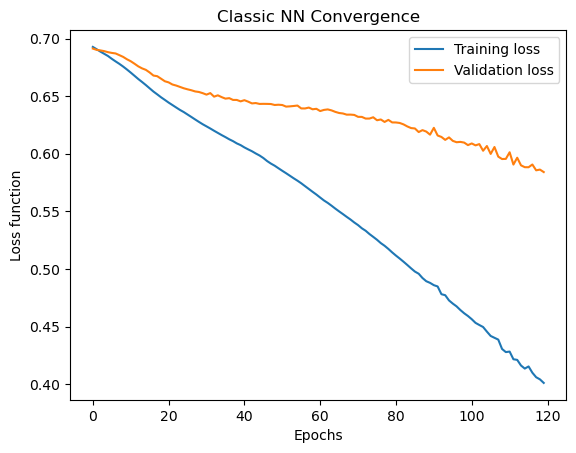

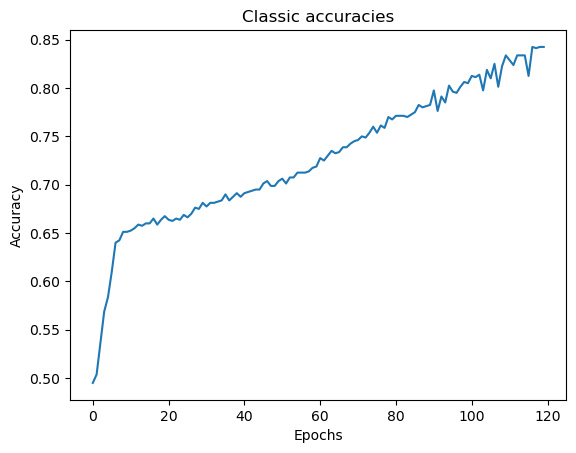

In [65]:
# plotting the training and validation loss
#GRAPHS

#------loss-validation/training-----
plt.plot(trainLosses, label='Training loss')
plt.plot(valLosses, label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.title("Classic NN Convergence")
#plt.yscale("log")
plt.savefig(hybridModelFolder+"LTVClassic.png")
plt.show()
#------loss-validation--------

plt.figure()
plt.plot(accuracyTrainLosses, label='Accuracy training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Classic accuracies')
plt.savefig(hybridModelFolder+"ATClassic.png")
plt.show()

'''
plt.figure()
plt.title('Classic validation loss')
plt.plot(valLosses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.savefig(hybridModelFolder+hybridModelName+"LVClassic.png")
plt.show()
#------loss-training--------

plt.figure()
plt.title('Classic training loss')
plt.plot(trainLosses, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.savefig(hybridModelFolder+hybridModelName+"LTClassic.png")
plt.show()
------accuracies-training--------
plt.figure()
plt.plot(accuracyTrainLosses, label='Accuracy training')
plt.xlabel('Epochs')
plt.ylabel('Accuratezza')
plt.title('Classic accuracies')
plt.savefig(hybridModelFolder+hybridModelName+"ATClassic.png")
plt.show()
-----total-----
#plt.figure()
plt.title('Loss/Accuracies')
plt.plot(trainLosses, label='Training loss')
plt.plot(accuracyTrainLosses, label='Training accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.savefig(hybridModelFolder+hybridModelName+"ALTVClassic.png")'''
plt.show()

In [44]:
# We finally have a trained CNN! Let's use it to predict some data (I have a minimal dataset, so I'll just predict the training set):
scoresTrain = torch.sigmoid(model(trainSetTorch))[:,0]
scores_val = torch.sigmoid(model(validationSetTorch))[:,0]

# torch.sigmoid() is a function that rescales (nonlinearly) the network output from 0 to 1
# We obtained a scalar from 0 to 1 for each cell. Let's define an assignment criterion:
predictionsTrain = scoresTrain > 0.5
predictionsVal = scores_val > 0.5
accuracyTrain = (predictionsTrain == trainLabelsTorch).sum()/ trainLabelsTorch.shape[0]
accuracyVal = (predictionsVal == validationLabelsTorch).sum()/ validationLabelsTorch.shape[0]
print("accuracy on training set: ", accuracyTrain.numpy())
print("accuracy on validation set: ", accuracyVal.numpy())

accuracy on training set:  0.86
accuracy on validation set:  0.825
